## 5.1 理解HTML页面结构

网页是一个纯文本文件，其中包含一些特殊的标记元素，用来告知浏览器应该如何向用户呈现要显示的内容。例如，如果我们想强调某个单词，那么只需像下面的代码那样【把单词用< >标签围住】即可。

所有的网页都具备这样的特性；它们本身都是由文本组成的，并且这些文本中会包含许多不同的【标签】。如果想从网页中提取数据，大抵可以采用两类心智模型

#### 5.1.1 行分隔模型：在分隔符(标签)处进行分隔
网页上有许多不同的HTML元素/标签，用来在网络上显示页面中的内容。如果我们想从这个简单的模型中抽取自己比较感兴趣的数据，就必须【把网页中的文字和嵌套在其中的HTML元素本身】当做【分隔符】

#### 5.1.2 树形结构模型：把标签组成树形结构
把文本页面想象成一个由HTML元素/标签组成的树形结构，其中每个元素/标签都与页面上的其他一些标签相关。每个标签都是一个节点，整棵树是由页面中所有节点组成的。在HTML中，如果一个标签出现在另一个标签的内容中，那么内部标签就被称为子标签，外部标签被称为父标签。

如果把HTML文本想象成树形结构，那么我们就可以使用编程语言来构建这棵树。这样，我们就可以【根据元素的名字或是在元素列表中的位置，提取需要的文本数据】

## 5.2  提取和清洗HTML页面数据的方法

#### 5.2.1 方法一：Python 和 正则表达式

第1步：查找并保存实验用的Web文件：把文件保存到你的本地工作目录，下载完成后得到一个.html结尾的文件

第2步：观察文件内容并判定有价值的数据

首先利用文本编辑器打开HTML文件，查看内容；

其次从每一行中找出看起来具有先相同特点的内容，进行查找规则

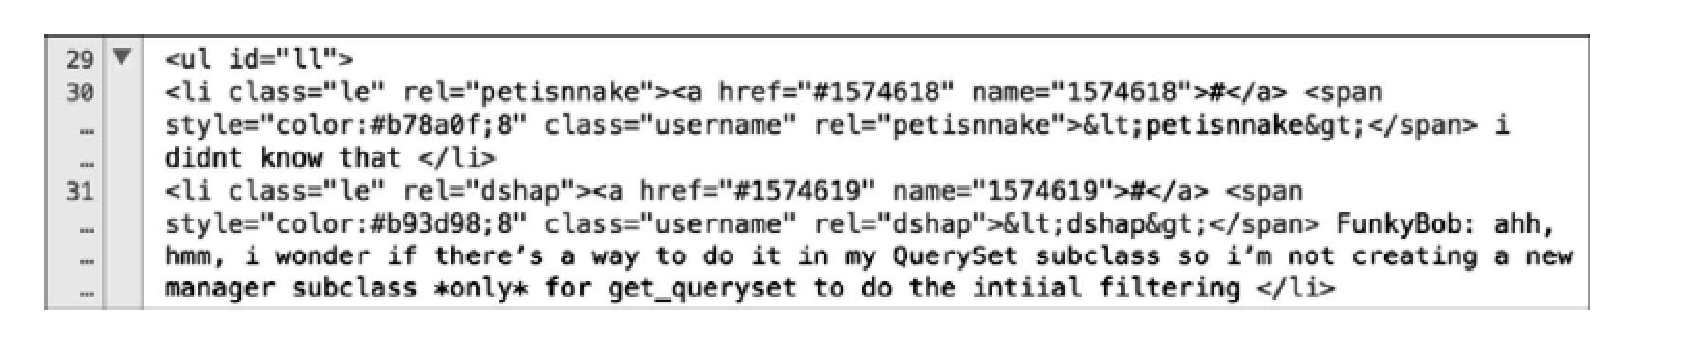

In [5]:
import matplotlib.image as mping
import matplotlib.pyplot as plt
pro=mping.imread(r"Django IRC日志.png")
plt.figure(figsize=(30,30))
plt.imshow(pro)
plt.axis('off')
plt.show()

In [11]:
print('1、需要抽取的三项数据都可以在标签<li>内找到，并且这个标签全部处于标签<ulid="ll">内部。每一个<li>代表一条聊天消息记录。')
print("2、在消息中，行号信息可以从两个位置找出：一处是字符串<a href=之后，另一处是name属性后面的双引号之间。在示例中，第一个出现的行号是1574618。")
print("3、属性username可以在三个地方找到，第一处是标签li class=le的rel属性值，第二处是标签span中的rel属性，最后一处则是处于&lt;和&gt;之间。在示例中，第一个username的值是petisnnake。")
print("4、消息信息处于标签</span>和</li>之间。在例子中，第一条消息是i didnt know that")

1、需要抽取的三项数据都可以在标签<li>内找到，并且这个标签全部处于标签<ulid="ll">内部。每一个<li>代表一条聊天消息记录。
2、在消息中，行号信息可以从两个位置找出：一处是字符串<a href=之后，另一处是name属性后面的双引号之间。在示例中，第一个出现的行号是1574618。
3、属性username可以在三个地方找到，第一处是标签li class=le的rel属性值，第二处是标签span中的rel属性，最后一处则是处于&lt;和&gt;之间。在示例中，第一个username的值是petisnnake。
4、消息信息处于标签</span>和</li>之间。在例子中，第一条消息是i didnt know that


第3步：编写python 程序把数据保存到csv文件中

In [ ]:
import re
import io
row=[]
infile=io.open('django13-sept-2014.html','r',encoding='utf8')
outfile=io.open('django13-sept-2014.html','w',encoding='utf8')
for line in infile:
    pattern=re.compile(ur'<li class=\"le\" rel=\"(.+?)\"><ahref=\"#(.+?)\" name=\"(.+?)<\/span> (.+?)</li>', re.UNICODE)
    # 文件中的每一行文本都会与该行代码构建出来的样式匹配进行比较。每组匹配的数据样式都是(.+?)，这样的数据共有五组，其中三组是感兴趣的
    #（用户名，行号和消息），另外两组对无用，直接丢弃。页面中的其余内容也会丢弃因为它们与我们设计的样式无法匹配。程序就像是一个筛子，当中恰好留了三个功能漏点。有用的数据都会从漏点中过滤下来，留下的都是无用的数据
    if pattern.search(line):
        username=pattern.search(line).group(1)
        linenum=pattern.search(line).group(2)
        message=pattern.search(line).group(4)
        row.append(linenum)
        row.append(username)
        row.append(message)
        outfile.write(','.join(row))
        outfile.write(u'\n')
        row=[]
infile.close()

使用正则表达式解析HTML的局限性：正则表达式完全依赖网页结构。如果你打算
从网站上收集数据，那么你今天编写的正则表达式很有可能明天就无法工作了。表达式样式只有
在页面布局没有发生变化的时候才能正常工作

#### 5.2.2 方法二：python和BeautifulSoup：利用BeautifulSoup来弥补正则表达式的局限性，来解析树形结构的HTML页面

第1步：找到并保存实验用的文件

第2步：安装BeautifulSoup

第3步：编写抽取数据用的Python程序

A.从li标签中的rel属性提取username值。

B.从标签中的name属性提取linenum值。这个标签指的是li内部的第一个a标签。

C.把message当作li标签的第四项内容（也就是数组中的内容[3]）来处理。还有一点需要注意的是，每条消息的前面都有一个打头的空白字符，我们需要在保存数据之
前把它处理掉。